<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Synthetics-Sample" data-toc-modified-id="Synthetics-Sample-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Synthetics Sample</a></span></li><li><span><a href="#Fit-The-two-dimensional-data:-Linear-SVC" data-toc-modified-id="Fit-The-two-dimensional-data:-Linear-SVC-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fit The two-dimensional data: Linear SVC</a></span></li><li><span><a href="#Three-dimensional-scatter-plot" data-toc-modified-id="Three-dimensional-scatter-plot-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Three dimensional scatter plot</a></span></li><li><span><a href="#Fit-the--three--dimensional-data:-Linear-SVC" data-toc-modified-id="Fit-the--three--dimensional-data:-Linear-SVC-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fit the  three- dimensional data: Linear SVC</a></span></li><li><span><a href="#Ellipse-decision-boundary" data-toc-modified-id="Ellipse-decision-boundary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Ellipse decision boundary</a></span></li><li><span><a href="#Kernel-Trick" data-toc-modified-id="Kernel-Trick-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Kernel Trick</a></span></li></ul></div>

# Synthetics Sample

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import mglearn 

Text(0, 0.5, 'Feature 1')

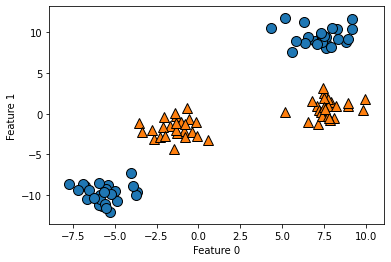

In [3]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# Fit The two-dimensional data: Linear SVC

C:\Users\mirnamamaranda\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

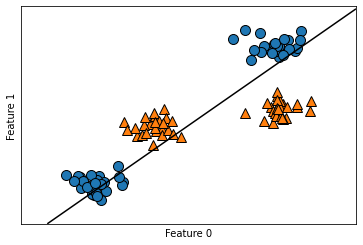

In [4]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# Three dimensional scatter plot

Text(0.5, 0, 'feature1 ** 2')

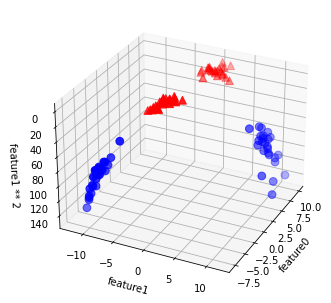

In [6]:
import numpy as np

# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d

figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y == 0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

# Fit the  three- dimensional data: Linear SVC 

C:\Users\mirnamamaranda\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature0 ** 2')

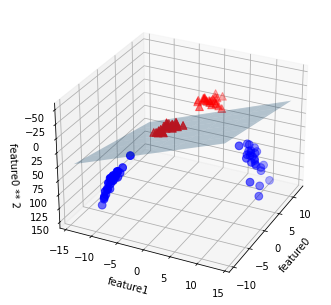

In [7]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")

# Ellipse decision boundary

Text(0, 0.5, 'Feature 1')

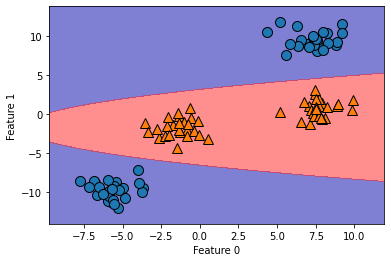

In [8]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# Kernel Trick

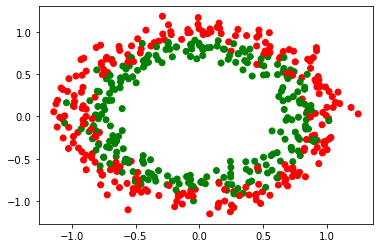

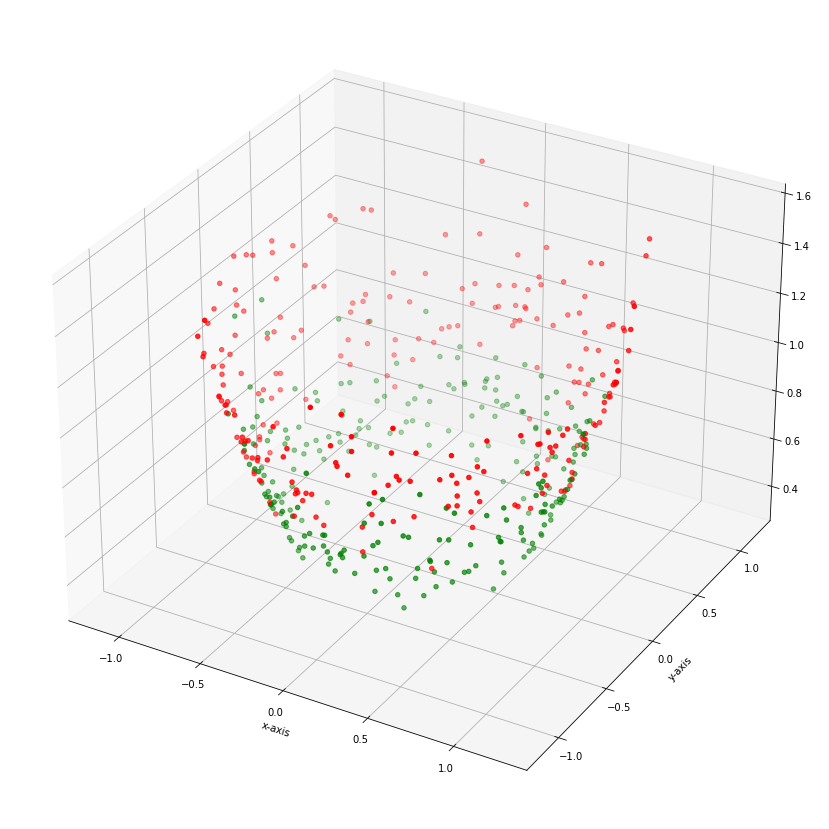

In [9]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
#---X is features and c is the class labels---
X, c = make_circles(n_samples=500, noise=0.09)
rgb = np.array(['r', 'g'])
plt.scatter(X[:, 0], X[:, 1], color=rgb[c])
plt.show()

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
z = X[:,0]**2 + X[:,1]**2
ax.scatter(X[:, 0], X[:, 1], z, color=rgb[c])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

In [24]:
#---combine X (x-axis,y-axis) and z into single ndarray---
features = np.concatenate((X,z.reshape(-1,1)), axis=1)
#---use SVM for training---
from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(features, c)

SVC(kernel='linear')

In [15]:
x3 = lambda x,y: (-clf.intercept_[0] - clf.coef_[0][0] * x-clf.coef_[0][1] * y)/clf.coef_[0][2]


In [16]:
tmp = np.linspace(-1.5,1.5,100)
x,y = np.meshgrid(tmp,tmp)
ax.plot_surface(x, y, x3(x,y))
plt.show()

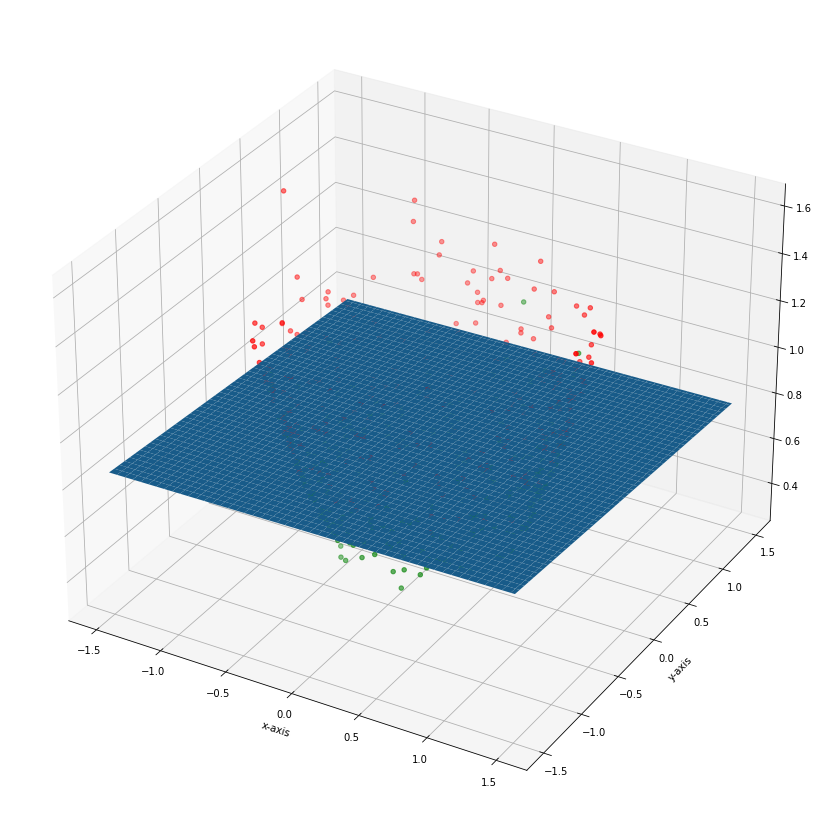

In [30]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
#---X is features and c is the class labels---
X, c = make_circles(n_samples=500, noise=0.09)
z = X[:,0]**2 + X[:,1]**2
rgb = np.array(['r', 'g'])
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], z, color=rgb[c])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
# plt.show()
#---combine X (x-axis,y-axis) and z into single ndarray---
features = np.concatenate((X,z.reshape(-1,1)), axis=1)
#---use SVM for training---
from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(features, c)
x3 = lambda x,y: (-clf.intercept_[0] - clf.coef_[0][0] * x-clf.coef_[0][1]
* y) / clf.coef_[0][2]
tmp = np.linspace(-1.5,1.5,100)
x,y = np.meshgrid(tmp,tmp)
ax.plot_surface(x, y, x3(x,y))
plt.show()